#  Customer Churn Analysis
## 1. Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# 2. Import Liabrary

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3. Import dataset

In [532]:
data=pd.read_csv("customer_churn.csv")

# 4.1 Basic Data Exploration

## 4.1.1 Shape of Dataset

In [533]:
data.shape

(7043, 21)

**Observation**
- There are 7043 rows are available in dataset.
- There are 21 columns in dataset.

## 4.1.2 Dataset columns data type

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation**
- There are 21 columns in dataset, where 1 columns is float type, 2 column is int and 18 columns are object type.
- There are no null value present in dataset, we will confirm this again later.


## 4.1.3 Statistical Summary

In [535]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Observation**
- Tenure minimum value is zero.
- Numerice features value mean and 50% data value has some difference, which signifies that distribution is not normal.


## 4.4 Checking Null value

In [536]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**As we have seen before no null value in dataset.**

## 4.5 Checking dublicate Entry

In [537]:
s=data.duplicated()
s.sum()

0

**To confirm that there is no dublicate row in dataset.**

## 4.6 Checking unique data level for each categorical feature

In [538]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# 5.Seperating Numerical and Categorical value

In [539]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

In [540]:
numeric_feat

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [541]:
categorical_feat

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

# 6 Exploratory Data Analysis

## 6.1 Univariate Analysis

In [542]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### CustomerID

In [543]:
data["customerID"]

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

**Customer ID is having unique identification so we would not need this columns for our analysis.**

### Gender

In [544]:
data["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

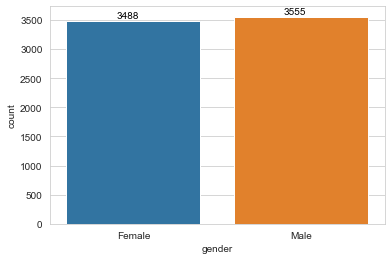

In [545]:
s=sns.countplot(data["gender"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [546]:
data["gender"].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

### SenoirCitizen

In [547]:
data["SeniorCitizen"]=data["SeniorCitizen"].map({0:"No",1:"Yes"})

In [548]:
data["SeniorCitizen"].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

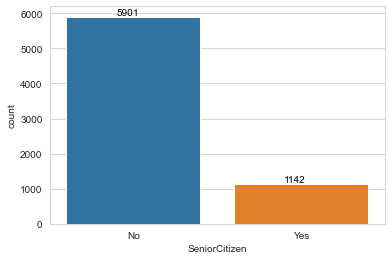

In [549]:
s=sns.countplot(data["SeniorCitizen"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [550]:
data["SeniorCitizen"].value_counts(normalize=True)

No     0.837853
Yes    0.162147
Name: SeniorCitizen, dtype: float64

### Partner

In [551]:
data["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

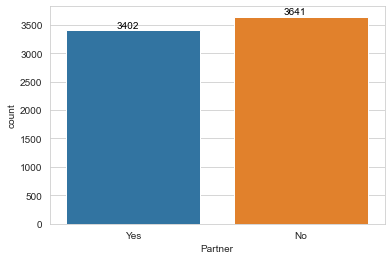

In [552]:
s=sns.countplot(data["Partner"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [553]:
data["Partner"].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

### Dependents

In [554]:
data["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

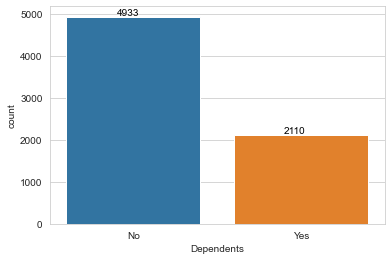

In [555]:
s=sns.countplot(data["Dependents"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [556]:
data["Dependents"].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

### Tenure

In [557]:
data["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

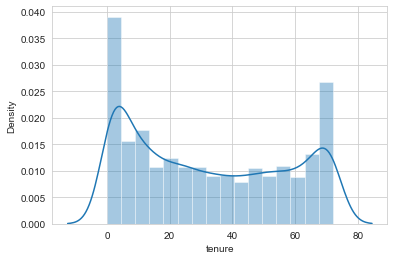

In [558]:
sns.distplot(data["tenure"])

**We will convert tenure in short and long, below 24 months will tag as short and more than 24 months will tag as Long.**

In [559]:
def tenure(data):
    if 0 < data <=24:
        return "Short"
    else:
        return "Long"

data["tenure"]=data["tenure"].apply(tenure)

In [560]:
data["tenure"].value_counts()

Long     3844
Short    3199
Name: tenure, dtype: int64

### PhoneService

In [561]:
data["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

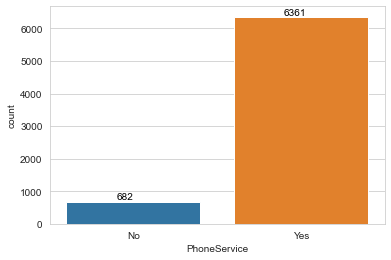

In [562]:
s=sns.countplot(data["PhoneService"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### MultipleLines

In [563]:
data["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

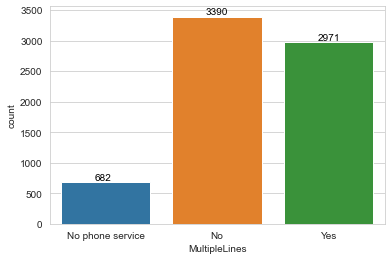

In [564]:
s=sns.countplot(data["MultipleLines"])
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### InternetService

In [565]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

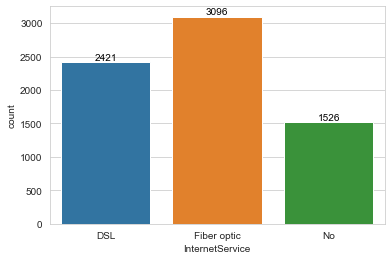

In [566]:
s=sns.countplot(data["InternetService"])
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    

In [567]:
data["InternetService"].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

### Online Security

In [568]:
data["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

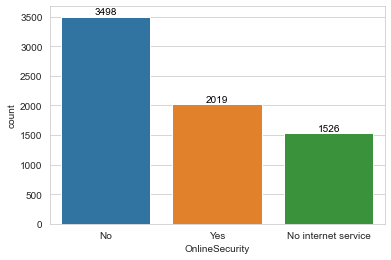

In [569]:
s=sns.countplot(data["OnlineSecurity"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

### Online Backup

In [570]:
data["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

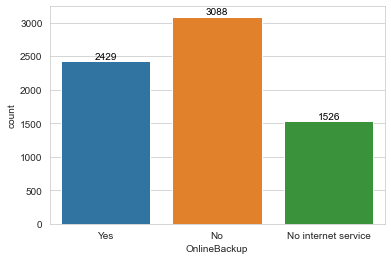

In [571]:
s=sns.countplot(data["OnlineBackup"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [572]:
data["OnlineBackup"].value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

### DeviceProtection

In [573]:
data["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

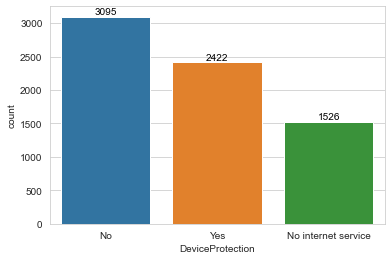

In [574]:
s=sns.countplot(data["DeviceProtection"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [575]:
data["DeviceProtection"].value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

### TechSupport

In [576]:
data["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

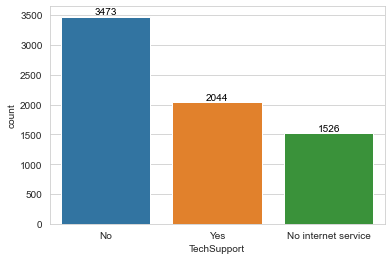

In [577]:
s=sns.countplot(data["TechSupport"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

In [578]:
data["TechSupport"].value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

### StreamingTV

In [579]:
data["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

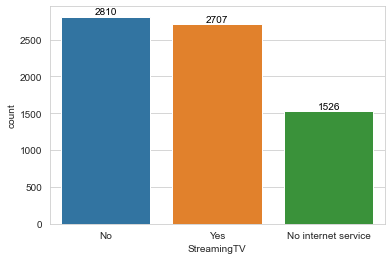

In [580]:
s=sns.countplot(data["StreamingTV"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    

In [581]:
data["StreamingTV"].value_counts(normalize=True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

### Streaming Movies

In [582]:
data["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

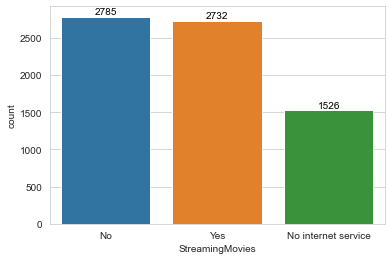

In [583]:
s=sns.countplot(data["StreamingMovies"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    

In [584]:
data["StreamingMovies"].value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

### Contract

In [585]:
data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

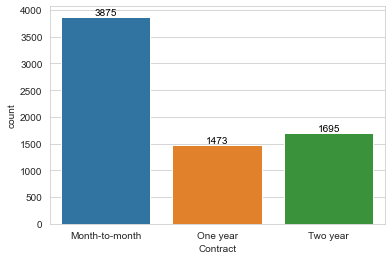

In [586]:
s=sns.countplot(data["Contract"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    

### Paperless Billing

In [587]:
data["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

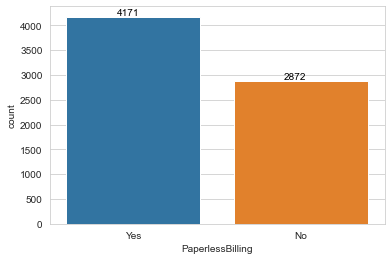

In [588]:
s=sns.countplot(data["PaperlessBilling"])
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   
    

### Patment Method

In [589]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

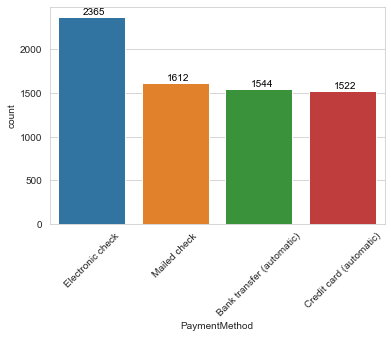

In [590]:
s=sns.countplot(data["PaymentMethod"])
s.set_xticklabels(s.get_xticklabels(),rotation=45);
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

In [591]:
data["PaymentMethod"].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

### Monthly Chareges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

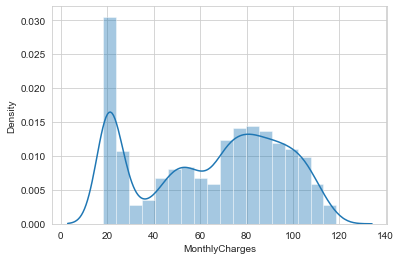

In [592]:
sns.distplot(data["MonthlyCharges"])

**We will coerced monthly charges to a 2 level low charge and high charge, 0 to 70 we will make low charge and more than 70 will make High charge.**

In [593]:
def charges(data):
    if 0 < data <= 70:
        return "LowCharge"
    else:
        return "HighCharge"
data["MonthlyCharges"]=data["MonthlyCharges"].apply(charges)

In [594]:
data["MonthlyCharges"].value_counts()

HighCharge    3583
LowCharge     3460
Name: MonthlyCharges, dtype: int64

### TotalCharges

In [595]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"],errors="coerce")

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

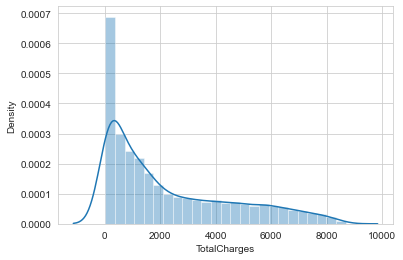

In [596]:
sns.distplot(data["TotalCharges"])

### Churn

In [597]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

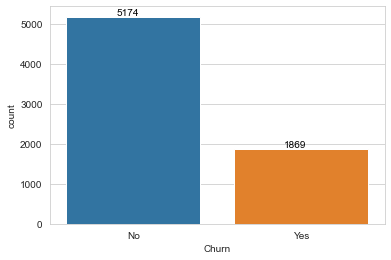

In [598]:
s=sns.countplot(data["Churn"])

for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")   

**As we can see from above plot that Target variable data is inbalanced so we will deal with this in future.**

## 6.2 Bivariate Analysis/Multivariate Analysis

### Gender VS Churn

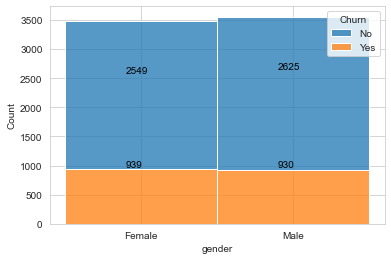

In [599]:
s=sns.histplot(x="gender",hue="Churn",data=data,multiple="stack")
for p in s.patches:
     s.annotate(int(p.get_height()),(p.get_x()+0.40,p.get_height()+1),va="bottom",color="black")   

**Observation**
- As we can see that Male and Female have almost equal chances of getting churn.

### SeniorCitizen Vs Churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Count'>

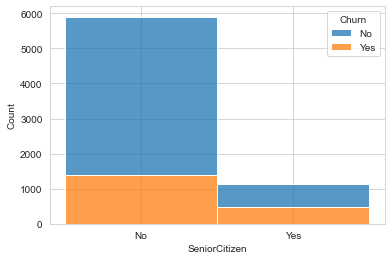

In [600]:
sns.histplot(x="SeniorCitizen",hue="Churn",data=data,multiple="stack")

**Observation**
- As we can see that Senior citizen customer has more chances of churn compare to non senior citizen

### Partner Vs Churn

<AxesSubplot:xlabel='Partner', ylabel='Count'>

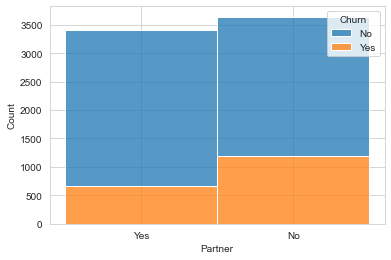

In [601]:
sns.histplot(x="Partner",hue="Churn",data=data,multiple="stack")

**Observation**
- From the plot we can infer that No partner type customer having more churn.

### Dependents Vs Churn

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

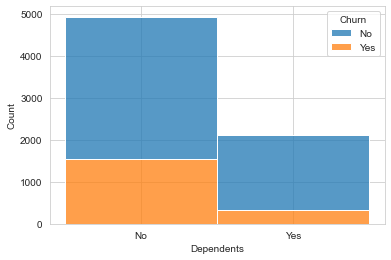

In [602]:
sns.histplot(x="Dependents",hue="Churn",data=data,multiple="stack")

**Observation**
- We can infer that with No Dependents type customer churn chances is more.

### PhoneService Vs Churn

<AxesSubplot:xlabel='PhoneService', ylabel='Count'>

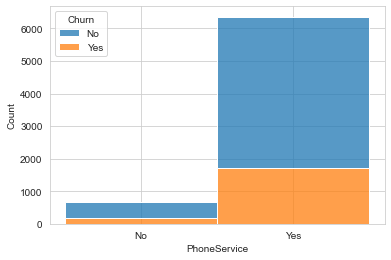

In [603]:
sns.histplot(x="PhoneService",hue="Churn",data=data,multiple="stack")

In [604]:
pd.crosstab(data["PhoneService"],data["Churn"])

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


**Observation**
- As we can see that PhoneService has equal chances on churn,we cant decide whetere customer will churn or not with phone Service.

### MultipleLines Vs Churn

<AxesSubplot:xlabel='MultipleLines', ylabel='Count'>

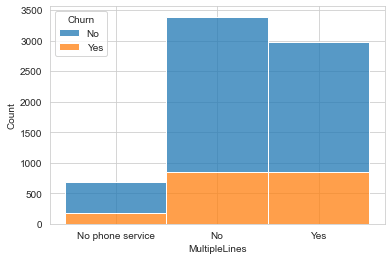

In [605]:
sns.histplot(x="MultipleLines",hue="Churn",data=data,multiple="stack")

In [606]:
pd.crosstab(data["MultipleLines"],data["Churn"])

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


**Observation**
- We can see when The customer having multiplelines chances is slightly high for churn.

### InternetService Vs Churn

<AxesSubplot:xlabel='InternetService', ylabel='Count'>

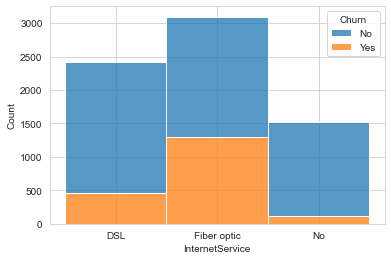

In [607]:
sns.histplot(x="InternetService",hue="Churn",data=data,multiple="stack")

In [608]:
pd.crosstab(data["InternetService"],data["Churn"])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


**Observation**
- The customer churn chances are more if they have Fiberoptic internet service.

### Online Security

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Count'>

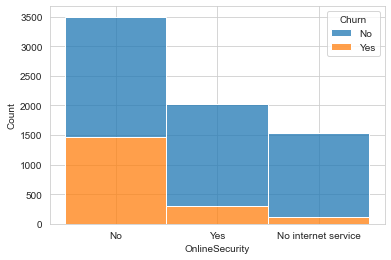

In [609]:
sns.histplot(x="OnlineSecurity",hue="Churn",data=data,multiple="stack")

In [610]:
pd.crosstab(data["OnlineSecurity"],data["Churn"])

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


**Observation**
- Churn chances is more if Customer dont have online security.

### Online Backup

<AxesSubplot:xlabel='OnlineBackup', ylabel='Count'>

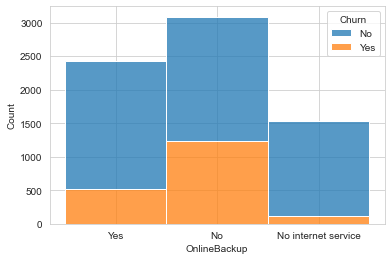

In [611]:
sns.histplot(x="OnlineBackup",hue="Churn",data=data,multiple="stack")

In [612]:
pd.crosstab(data["OnlineBackup"],data["Churn"])

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


**Observation**
- The customer who dont have online Backup, Chances are more for those customer to Churn.

### Device Protection

<AxesSubplot:xlabel='DeviceProtection', ylabel='Count'>

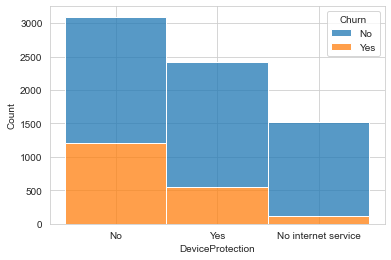

In [613]:
sns.histplot(x="DeviceProtection",hue="Churn",data=data,multiple="stack")

In [614]:
pd.crosstab(data["DeviceProtection"],data["Churn"])

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


**Observation**
- We can infer from the plot that if Customer dont have Device Protection then more chances of churn for those customer.

### TechSupport Vs Churn

<AxesSubplot:xlabel='TechSupport', ylabel='Count'>

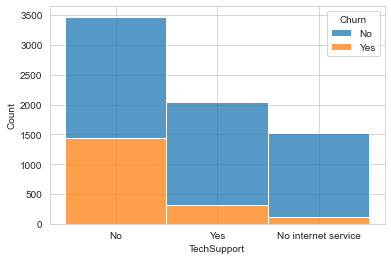

In [615]:
sns.histplot(x="TechSupport",hue="Churn",data=data,multiple="stack")

**Observation**
- Churn chances is less if there is proper Tech Support for customer.

### Contract Vs Churn

<AxesSubplot:xlabel='Contract', ylabel='Count'>

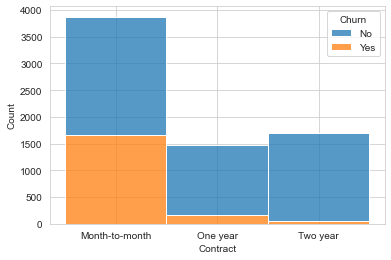

In [616]:
sns.histplot(x="Contract",hue="Churn",data=data,multiple="stack")

**Observation**
- we can infer from the plot that the more year contract with cusomer the chances of getting churn is less.
- Monthly contract type customer churn rate is very high.

### Payment Method VS Churn

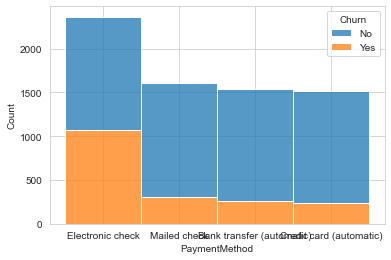

In [617]:
s=sns.histplot(x="PaymentMethod",hue="Churn",data=data,multiple="stack")

In [618]:
pd.crosstab(data["PaymentMethod"],data["Churn"])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


**Observation**
- We Can see high churn rate on electronic type of payment method.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

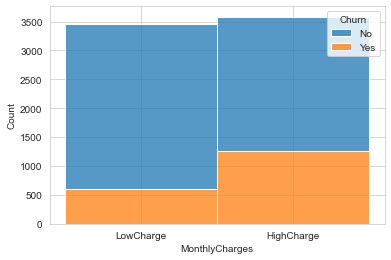

In [619]:
sns.histplot(x="MonthlyCharges",hue="Churn",data=data,multiple="stack")

In [620]:
pd.crosstab(data["MonthlyCharges"],data["Churn"])

Churn,No,Yes
MonthlyCharges,,
HighCharge,2316,1267
LowCharge,2858,602


**Observation**
- As we can see low monthly charges has impact on churn,lower rate of churn with low charges.

# 7. Churn rate for categorical feature factors

In [621]:
tt=pd.melt(data,id_vars=["Churn"],value_vars=data[data.columns[1:18]],var_name="variable1",value_name="event")

In [622]:
tt["variable2"]=tt["variable1"]+"_"+tt["event"]

In [623]:
mt1=pd.crosstab(tt.Churn,tt.variable2,normalize="columns").T.add_prefix("Churn_")
mt2=mt1.assign(**mt1.index.to_frame()).sort_values(["Churn_Yes"])

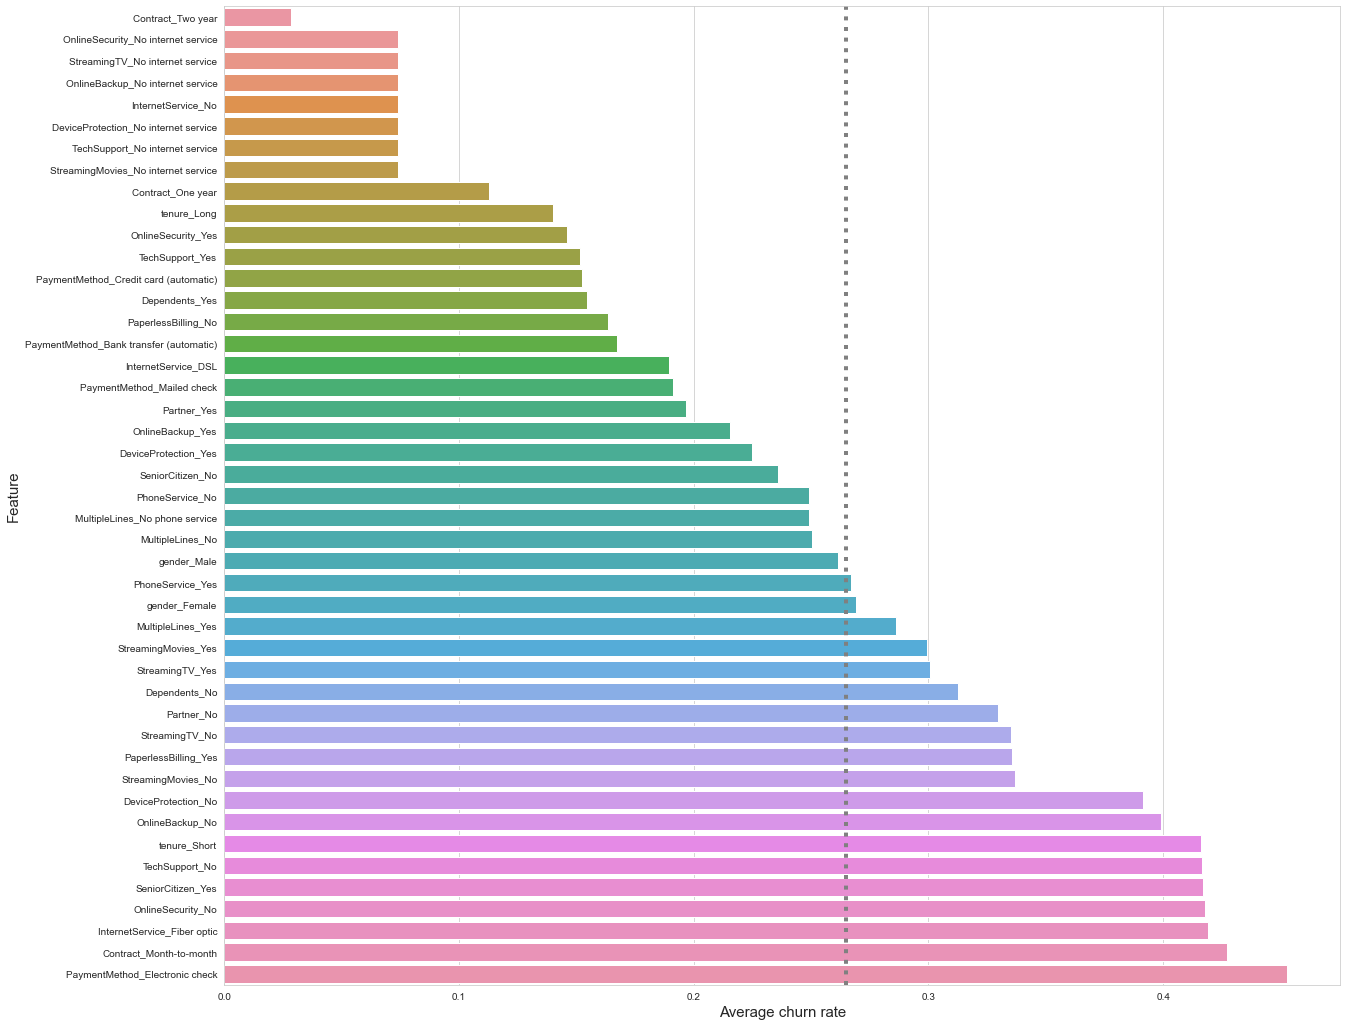

In [624]:
plt.figure(figsize=(20,18))
sns.barplot(y="variable2",x="Churn_Yes",data=mt2)
t1=sns.set_style("whitegrid")
plt.xlabel("Average churn rate",fontsize=15)
plt.ylabel("Feature",fontsize=15,)
plt.axvline(.265,ls=":",lw=4,color="red",c=".5")

plt.show()

**Observation**
- We can find from plot that payment method by electronic check, Contract Month to month,Internet Service Fiber optic,tenure less than 24 months,Monthly charges more than 70 having much higher than the average rates of churn.
- On the other contract one year and 2 year,tenure more than 24 months,payment method credit card/online transfer,momthly charge with low rate having much lower than the average rates of churn.

# 8. Multiple Correspondence Analysis

In [625]:
#We will drop total charges columns for MCA as this columns is float type.

In [626]:
data.drop(["TotalCharges","customerID"],axis=1,inplace=True)

In [627]:
import prince

In [628]:
mca=prince.MCA(n_components=10,
              n_iter=3,
              copy=True,
              check_input=True,
              engine="auto")

In [629]:
data_mca=mca.fit(data)

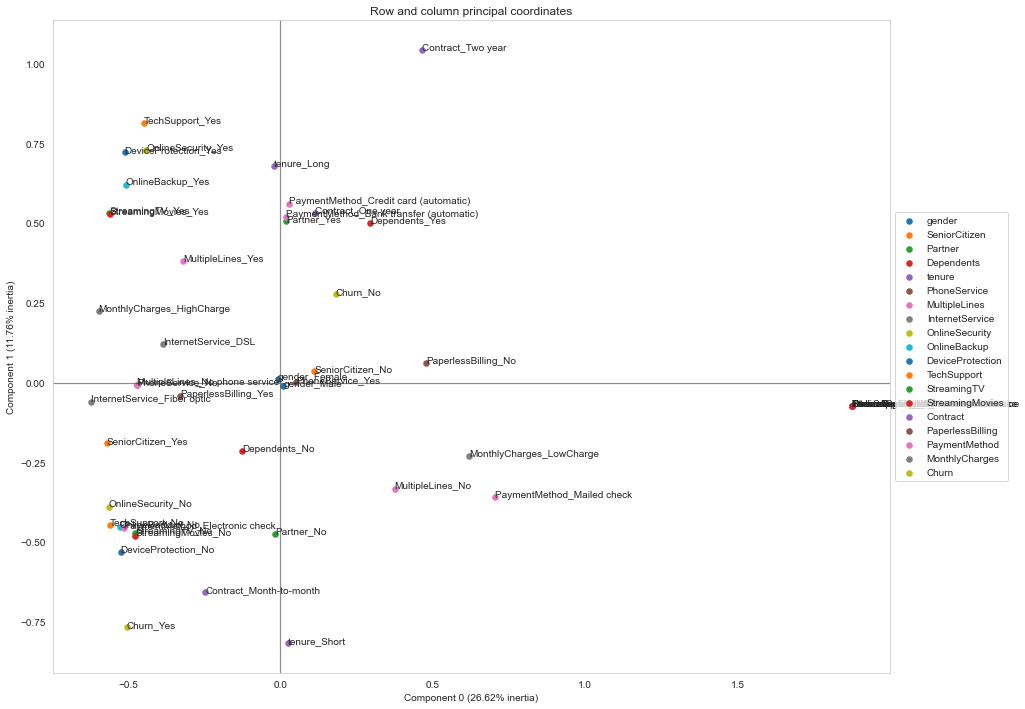

In [630]:
ax=data_mca.plot_coordinates(X=data,ax=None,figsize=(15,12),
                            show_row_points=False,
                            row_points_size=0,
                            show_row_labels=False,
                            show_column_points=True,
                            column_points_size=30,
                            show_column_labels=True,
                            legend_n_cols=1).legend(loc="center left",bbox_to_anchor=(1,0.5))

**Observation**
- We can infer from above plot that those factors which are nearby of churn yes, causes for more churn in telecome choices.like Contract monthly,payment method electornic check,senior citizen etc.
- Factors like payment method credit card,monthly high charges more than 70,paperless billing,internet service DSL type having less churn.

# 9. Feature Transformation

In [631]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

## 9.1 Dealing with Gender with Lable Encoder

In [632]:
data["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

**In gender there are two class Male and Female, so we will applying Label Encoding technique.**

In [633]:
from sklearn.preprocessing import LabelEncoder

In [634]:
lab_enc=LabelEncoder()

In [635]:
z=lab_enc.fit_transform(data.gender.values.reshape(-1,1))

In [636]:
data["gender"]=z

In [637]:
data["gender"].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

## 9.2 Dealing Senior Citizen with Lable Encoder

In [638]:
data["SeniorCitizen"].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [639]:
z=lab_enc.fit_transform(data.SeniorCitizen.values.reshape(-1,1))

In [640]:
data["SeniorCitizen"]=z

In [641]:
data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

## 9.3 Dealing Partner with Lable Encoder

In [642]:
data["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [643]:
z=lab_enc.fit_transform(data.Partner.values.reshape(-1,1))

In [644]:
data["Partner"]=z

In [645]:
data["Partner"].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

## 9.4 Dealing Dependents with Label Encoder

In [646]:
data["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [647]:
z=lab_enc.fit_transform(data.Dependents.values.reshape(-1,1))

In [648]:
data["Dependents"]=z

In [649]:
data["Dependents"].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

## 9.5 Dealing with tenure Ordinal Encoder

In [650]:
data["tenure"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Short
1        Long
2       Short
3        Long
4       Short
        ...  
7038    Short
7039     Long
7040    Short
7041    Short
7042     Long
Name: tenure, Length: 7043, dtype: object>

In [651]:
from sklearn.preprocessing import OrdinalEncoder

In [652]:
enc=OrdinalEncoder(categories=[["Short","Long"]])

In [653]:
z=enc.fit_transform(data.tenure.values.reshape(-1,1))

In [654]:
data["tenure"]=z

In [655]:
data["tenure"].value_counts()

1.0    3844
0.0    3199
Name: tenure, dtype: int64

## 9.6 Dealing Phone Service with Label Encoder

In [656]:
data["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [657]:
z=lab_enc.fit_transform(data.Dependents.values.reshape(-1,1))

In [658]:
data["PhoneService"]=z

In [659]:
data["PhoneService"].value_counts()

0    4933
1    2110
Name: PhoneService, dtype: int64

## 9.7 Dealing MultipleLines with One Hot Encoding

In [660]:
data["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [661]:
from sklearn.preprocessing import OneHotEncoder

In [662]:
onehotencoder=OneHotEncoder()

In [663]:
x=onehotencoder.fit_transform(data.MultipleLines.values.reshape(-1,1)).toarray()

In [664]:
j=data["MultipleLines"].value_counts()

In [665]:
dataonehot=pd.DataFrame(x,columns=["MultipleLines_"+str(i) for i in j.index])

In [666]:
data=pd.concat([data,dataonehot],axis=1)

In [667]:
data.drop("MultipleLines",axis=1,inplace=True)

## 9.8 Dealing InternetService with OneHotEncoder

In [668]:
x=onehotencoder.fit_transform(data.InternetService.values.reshape(-1,1)).toarray()

In [669]:
j=data["InternetService"].value_counts()

In [670]:
dataonehot=pd.DataFrame(x,columns=["InternetService_"+str(i) for i in j.index])

In [671]:
data=pd.concat([data,dataonehot],axis=1)

In [672]:
data.drop("InternetService",axis=1,inplace=True)

## 9.9 Dealing OnlineSecurity with One Hot Encoder

In [673]:
x=onehotencoder.fit_transform(data.OnlineSecurity.values.reshape(-1,1)).toarray()
j=data["OnlineSecurity"].value_counts()
dataonehot=pd.DataFrame(x,columns=["OnlineSecurity_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("OnlineSecurity",axis=1,inplace=True)

## 9.10 Dealing OnlineBackup with One Hot Encoder

In [674]:
x=onehotencoder.fit_transform(data.OnlineBackup.values.reshape(-1,1)).toarray()
j=data["OnlineBackup"].value_counts()
dataonehot=pd.DataFrame(x,columns=["OnlineBackup_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("OnlineBackup",axis=1,inplace=True)

## 9.11 Dealing Device Prodection columns with One Hot Encoder

In [675]:
x=onehotencoder.fit_transform(data.DeviceProtection.values.reshape(-1,1)).toarray()
j=data["DeviceProtection"].value_counts()
dataonehot=pd.DataFrame(x,columns=["DeviceProtection_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("DeviceProtection",axis=1,inplace=True)

## 9.12 Dealing TechSupport columns with One hot Encoder

In [676]:
x=onehotencoder.fit_transform(data.TechSupport.values.reshape(-1,1)).toarray()
j=data["TechSupport"].value_counts()
dataonehot=pd.DataFrame(x,columns=["TechSupport_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("TechSupport",axis=1,inplace=True)

## 9.13 Dealing StreamingTV with OneHotEncoder

In [677]:
x=onehotencoder.fit_transform(data.StreamingTV.values.reshape(-1,1)).toarray()
j=data["StreamingTV"].value_counts()
dataonehot=pd.DataFrame(x,columns=["StreamingTV_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("StreamingTV",axis=1,inplace=True)

## 9.14 Dealing StreamingMovies with OneHotEncoder

In [678]:
x=onehotencoder.fit_transform(data.StreamingMovies.values.reshape(-1,1)).toarray()
j=data["StreamingMovies"].value_counts()
dataonehot=pd.DataFrame(x,columns=["StreamingMovies_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("StreamingMovies",axis=1,inplace=True)

## 9.15 Dealing Contract with OneHot Encoder

In [679]:
x=onehotencoder.fit_transform(data.Contract.values.reshape(-1,1)).toarray()
j=data["Contract"].value_counts()
dataonehot=pd.DataFrame(x,columns=["Contract_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("Contract",axis=1,inplace=True)

## 9.16 Dealing PaperlessBilling with Label Encoder

In [680]:
z=lab_enc.fit_transform(data.Dependents.values.reshape(-1,1))

In [681]:
data["PaperlessBilling"]=z

In [682]:
data["PaperlessBilling"].value_counts()

0    4933
1    2110
Name: PaperlessBilling, dtype: int64

## 9.17 Dealing Payment Method with One Hot Encoder

In [683]:
x=onehotencoder.fit_transform(data.PaymentMethod.values.reshape(-1,1)).toarray()
j=data["PaymentMethod"].value_counts()
dataonehot=pd.DataFrame(x,columns=["PaymentMethod_"+str(i) for i in j.index])
data=pd.concat([data,dataonehot],axis=1)
data.drop("PaymentMethod",axis=1,inplace=True)

## 9.18 Dealing MonthlyCharges with Ordinal Encoder

In [684]:
enc=OrdinalEncoder(categories=[["LowCharge","HighCharge"]])
z=enc.fit_transform(data.MonthlyCharges.values.reshape(-1,1))

In [685]:
data["MonthlyCharges"]=z

In [686]:
data["MonthlyCharges"].value_counts()

1.0    3583
0.0    3460
Name: MonthlyCharges, dtype: int64

# 10. Dealing Inbalanced Target Label

In [687]:
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

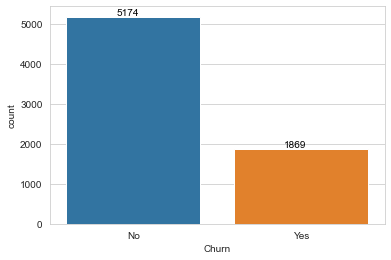

In [688]:
s=sns.countplot(data["Churn"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")


**As in above plot its cleary shown that target label is inblanced, so for reactifying the inblanced issue we will use upscaling techinque to avoid any data loss.**

In [689]:
data.loc[data["Churn"]=="No","Churn"]=0
data.loc[data["Churn"]=="Yes","Churn"]=1

In [690]:
data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [691]:
class_count_0,class_count_1=data["Churn"].value_counts()

In [692]:
class_0=data[data["Churn"]==0]
class_1=data[data["Churn"]==1]

In [693]:
print("Class 0:",class_0.shape)
print("Class 1:",class_1.shape)

Class 0: (5174, 40)
Class 1: (1869, 40)


In [694]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_over=pd.concat([class_1_over,class_0],axis=0)
print("Total class of 1 and 0:",test_over["Churn"].value_counts())

Total class of 1 and 0: 0    5174
1    5174
Name: Churn, dtype: int64


In [695]:
data=pd.DataFrame(test_over)

In [696]:
data["Churn"].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [697]:
data.shape

(10348, 40)

In [698]:
data.reset_index(drop=True,inplace=True)

In [699]:
data.shape

(10348, 40)

# 11. Split Train and Test Dataset

In [700]:
data_types_dict={"Churn":int}

In [701]:
data=data.astype(data_types_dict)

In [702]:
x=data.drop("Churn",axis=1)

In [703]:
y=data.Churn

In [704]:
x.shape

(10348, 39)

In [705]:
y.shape

(10348,)

# 12. Feature Extracting with PCA

In [706]:
from sklearn.decomposition import PCA

In [707]:
pca=PCA()

In [708]:
principalcomponent=pca.fit_transform(x)

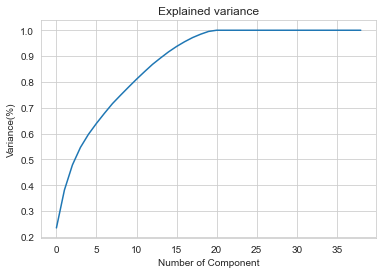

In [709]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Component")
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**As we can see more than 15 components the model covers more than 90% of variance.we will see accuracy withouth removing any features.**

# Model Building

# 17.1 Logistic Regression`

In [834]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_confusion_matrix

In [835]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [836]:
lr=LogisticRegression()

## 17.2 Choosing best Random State for model

In [386]:
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training accuracy score is-",accuracy_score(y_train,pred_train)*100)
        print("Testing accuracy score is-",accuracy_score(y_test,pred_test)*100)
   

At random state 3 Model perfrom well
At random state 3
Training accuracy score is- 75.71448294905426
Testing accuracy score is- 75.65217391304347
At random state 28 Model perfrom well
At random state 28
Training accuracy score is- 75.67306364765982
Testing accuracy score is- 75.65217391304347
At random state 50 Model perfrom well
At random state 50
Training accuracy score is- 75.783515118045
Testing accuracy score is- 75.81320450885669
At random state 64 Model perfrom well
At random state 64
Training accuracy score is- 75.86635372083391
Testing accuracy score is- 75.94202898550725
At random state 110 Model perfrom well
At random state 110
Training accuracy score is- 75.79732155184315
Testing accuracy score is- 75.78099838969405
At random state 129 Model perfrom well
At random state 129
Training accuracy score is- 75.88016015463207
Testing accuracy score is- 75.9098228663446
At random state 136 Model perfrom well
At random state 136
Training accuracy score is- 75.67306364765982
Testing 

**We can choose best random state is 326.**

In [837]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=326)

In [838]:
lr=LogisticRegression()

In [839]:
lr.fit(x_train,y_train)

LogisticRegression()

## 17.3 Evaluation Matrix

In [840]:
y_pred=lr.predict(x_test)

In [841]:
lr_acc_score=accuracy_score(y_test,y_pred)

In [842]:
lr_acc_score

0.7578099838969404

In [843]:
confusion_matrix(y_test,y_pred)

array([[1112,  437],
       [ 315, 1241]], dtype=int64)

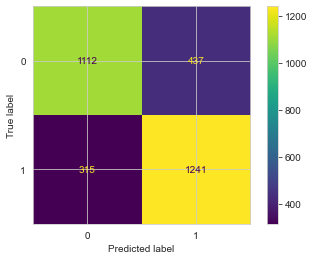

In [844]:
plot_confusion_matrix(lr,x_test,y_test,values_format=".4g")

In [845]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1549
           1       0.74      0.80      0.77      1556

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



## 17.4 Finding Best CV for model

In [846]:
from sklearn.model_selection import cross_val_score,cross_validate

In [847]:
for j in range(2,12):
    lr_score=cross_val_score(lr,x,y,cv=j)
    lr_s=lr_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_score*100)
    print("Accuracy Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [75.66679552 75.87939698]
Accuracy Score: 75.77309625048318


At CV:- 3
Cross validation score is: [75.50724638 75.18121195 76.94984053]
Accuracy Score: 75.87943295193034


At CV:- 4
Cross validation score is: [75.6088133  76.18863549 74.13993042 77.50289911]
Accuracy Score: 75.86006957866253


At CV:- 5
Cross validation score is: [75.84541063 76.08695652 74.39613527 75.59207347 77.0420493 ]
Accuracy Score: 75.7925250360159


At CV:- 6
Cross validation score is: [75.65217391 75.1884058  76.52173913 73.85507246 76.04408353 77.78422274]
Accuracy Score: 75.84094959480817


At CV:- 7
Cross validation score is: [75.72684246 74.57741717 77.60487145 73.95128552 75.50744249 75.50744249
 77.40189445]
Accuracy Score: 75.75388514791854


At CV:- 8
Cross validation score is: [76.12055641 74.96136012 76.04327666 76.42967543 74.24593968 74.24593968
 77.10750193 77.33952049]
Accuracy Score: 75.81172130040368


At CV:- 9
Cross validation score is: [75.82608696 75.3

**We can choose best cv for model is 3.**

In [848]:
cross_val_score(lr,x,y,cv=3)

array([0.75507246, 0.75181212, 0.76949841])

In [849]:
lr_cv_score=cross_val_score(lr,x,y,cv=3).mean()

In [850]:
lr_cv_score

0.7587943295193034

In [851]:
lr_acc_score

0.7578099838969404

# 18.1 KNN Classifier

In [852]:
from sklearn.neighbors import KNeighborsClassifier

In [853]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=326)

In [854]:
knn=KNeighborsClassifier()

In [855]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## 18.2 Evaluation Matrix

In [856]:
y_pred=knn.predict(x_test)

In [857]:
knn_acc_score=accuracy_score(y_test,y_pred)

In [858]:
knn_acc_score

0.7549114331723027

In [859]:
confusion_matrix(y_test,y_pred)

array([[1062,  487],
       [ 274, 1282]], dtype=int64)

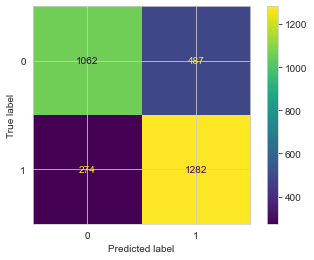

In [860]:
plot_confusion_matrix(knn,x_test,y_test,values_format=".4g")

In [861]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1549
           1       0.72      0.82      0.77      1556

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



## 18.3 Choosing Best CV

In [862]:
for j in range(2,12):
    knn_score=cross_val_score(knn,x,y,cv=j)
    knn_s=knn_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",knn_score*100)
    print("Accuracy Score:",knn_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [73.88867414 73.56010823]
Accuracy Score: 73.72439118670275


At CV:- 3
Cross validation score is: [75.53623188 75.18121195 75.09423021]
Accuracy Score: 75.27055801373498


At CV:- 4
Cross validation score is: [74.48782373 75.76343255 74.21724005 75.53150367]
Accuracy Score: 75.0


At CV:- 5
Cross validation score is: [76.23188406 76.32850242 74.7826087  75.54374094 77.09038183]
Accuracy Score: 75.99542358674054


At CV:- 6
Cross validation score is: [76.23188406 75.42028986 77.85507246 75.24637681 75.46403712 77.08816705]
Accuracy Score: 76.21763789412331


At CV:- 7
Cross validation score is: [76.20013523 74.57741717 77.19891746 75.91339648 75.71041949 75.43978349
 77.67253045]
Accuracy Score: 76.1017999659385


At CV:- 8
Cross validation score is: [75.88871716 74.88408037 75.57959815 77.74343122 75.63805104 74.86465584
 77.10750193 77.41686002]
Accuracy Score: 76.1403619656909


At CV:- 9
Cross validation score is: [75.73913043 76.86956522 76.695

**we Can choose best cv as 10**

In [863]:
cross_val_score(knn,x,y,cv=10)

array([0.76231884, 0.78743961, 0.74396135, 0.76231884, 0.78647343,
       0.74299517, 0.74975845, 0.77971014, 0.77466151, 0.76402321])

In [865]:
knn_cv_score=cross_val_score(knn,x,y,cv=10).mean()

In [866]:
knn_acc_score

0.7549114331723027

In [867]:
knn_cv_score

0.7653660564946412

# 19.1 Random Forest Classifier

In [868]:
from sklearn.ensemble import RandomForestClassifier

In [869]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [870]:
rfc=RandomForestClassifier()

In [871]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

## 19.2 Evaluation Matrix

In [872]:
y_pred=rfc.predict(x_test)

In [873]:
rfc_acc_score=accuracy_score(y_test,y_pred)

In [874]:
rfc_acc_score

0.8341384863123994

In [875]:
confusion_matrix(y_test,y_pred)

array([[1231,  326],
       [ 189, 1359]], dtype=int64)

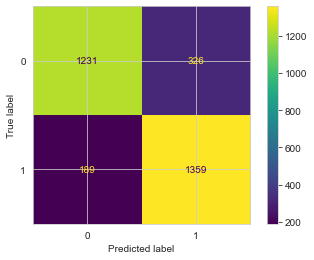

In [876]:
plot_confusion_matrix(rfc,x_test,y_test,values_format=".4g")

In [877]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1557
           1       0.81      0.88      0.84      1548

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



## 19.3 Choosing Best CV

In [878]:
for j in range(2,12):
    rfc_score=cross_val_score(rfc,x,y,cv=j)
    rfc_s=rfc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfc_score*100)
    print("Accuracy Score:",rfc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [80.94317743 80.84654039]
Accuracy Score: 80.89485890993429


At CV:- 3
Cross validation score is: [82.4057971  81.96578718 83.41548275]
Accuracy Score: 82.59568901158775


At CV:- 4
Cross validation score is: [83.0305373  83.6490143  82.7212988  85.38848087]
Accuracy Score: 83.69733281793583


At CV:- 5
Cross validation score is: [84.15458937 83.71980676 83.76811594 83.66360561 85.93523441]
Accuracy Score: 84.24827041932555


At CV:- 6
Cross validation score is: [84.23188406 83.88405797 85.10144928 83.94202899 84.10672854 86.07888631]
Accuracy Score: 84.55750585650716


At CV:- 7
Cross validation score is: [84.24611224 83.90804598 85.1826793  83.76184032 84.10013532 85.1150203
 86.53585927]
Accuracy Score: 84.69281324587133


At CV:- 8
Cross validation score is: [84.69860896 84.54404946 84.00309119 86.01236476 83.7587007  84.22273782
 85.76952823 86.62026295]
Accuracy Score: 84.95366800905124


At CV:- 9
Cross validation score is: [83.73913043 84.7

**We can choose best CV 11.**

In [893]:
cross_val_score(rfc,x,y,cv=11)

array([0.84059511, 0.8512221 , 0.84803401, 0.84697131, 0.8629118 ,
       0.84803401, 0.83528162, 0.84378321, 0.85319149, 0.87446809,
       0.86170213])

In [894]:
rfc_cv_score=cross_val_score(rfc,x,y,cv=11).mean()

In [895]:
rfc_acc_score

0.8341384863123994

In [896]:
rfc_cv_score

0.851181816126307

# 20.1 Decision Tree Classifier

In [907]:
from sklearn.tree import DecisionTreeClassifier

In [908]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=326)

In [909]:
dtc=DecisionTreeClassifier()

In [910]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

## 20.2 Evaluation Matrix

In [911]:
y_pred=dtc.predict(x_test)

In [912]:
dtc_acc_score=accuracy_score(y_test,y_pred)

In [913]:
dtc_acc_score

0.8115942028985508

In [914]:
confusion_matrix(y_test,y_pred)

array([[1162,  387],
       [ 198, 1358]], dtype=int64)

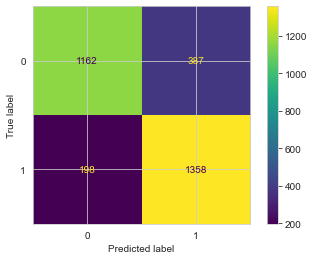

In [915]:
plot_confusion_matrix(dtc,x_test,y_test,values_format=".4g")

In [916]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1549
           1       0.78      0.87      0.82      1556

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



## 20.3 Choosing Best CV for model

In [917]:
for j in range(2,12):
    dtc_score=cross_val_score(dtc,x,y,cv=j)
    dtc_s=dtc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",dtc_score*100)
    print("Accuracy Score:",dtc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [78.0827213  78.58523386]
Accuracy Score: 78.33397758020874


At CV:- 3
Cross validation score is: [80.14492754 80.11017686 81.12496376]
Accuracy Score: 80.46002271890053


At CV:- 4
Cross validation score is: [80.51797449 81.25241593 80.74990336 82.06416699]
Accuracy Score: 81.14611519134132


At CV:- 5
Cross validation score is: [81.93236715 81.352657   82.31884058 82.64862252 82.35862736]
Accuracy Score: 82.12222292269364


At CV:- 6
Cross validation score is: [82.02898551 81.33333333 82.49275362 80.57971014 82.94663573 83.23665893]
Accuracy Score: 82.10301287871147


At CV:- 7
Cross validation score is: [81.67680865 81.54158215 82.88227334 83.01759134 82.54397835 82.34100135
 84.03247632]
Accuracy Score: 82.57653021546447


At CV:- 8
Cross validation score is: [82.22565688 82.68933539 80.98918083 84.38948995 81.82521268 83.68136118
 81.9025522  84.06805878]
Accuracy Score: 82.72135598771652


At CV:- 9
Cross validation score is: [82.         83.

**Best Cv we can choose 11.**

In [918]:
cross_val_score(dtc,x,y,cv=11)

array([0.82146652, 0.82996812, 0.81296493, 0.82465462, 0.8512221 ,
       0.83528162, 0.81827843, 0.82996812, 0.83617021, 0.83617021,
       0.84148936])

In [919]:
dtc_cv_score=cross_val_score(dtc,x,y,cv=11).mean()

In [920]:
dtc_cv_score

0.8298241304674027

In [921]:
dtc_acc_score

0.8115942028985508

# 21.1 Ada Boost Classifier

In [922]:
from sklearn.ensemble import AdaBoostClassifier

In [923]:
adc=AdaBoostClassifier()

In [924]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [925]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

## 21.2 Evaluation Matrix

In [926]:
y_pred=adc.predict(x_test)

In [927]:
adc_acc_score=accuracy_score(y_test,y_pred)

In [928]:
adc_acc_score

0.7565217391304347

In [929]:
confusion_matrix(y_test,y_pred)

array([[1115,  442],
       [ 314, 1234]], dtype=int64)

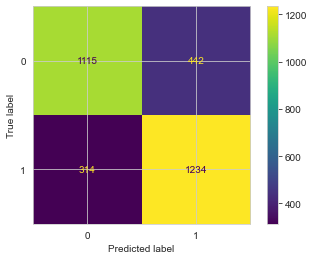

In [930]:
plot_confusion_matrix(adc,x_test,y_test,values_format=".4g")

In [931]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1557
           1       0.74      0.80      0.77      1548

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



## 21.3 Finding Best CV score

In [932]:
for j in range(2,12):
    adc_score=cross_val_score(adc,x,y,cv=j)
    adc_s=adc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",adc_score*100)
    print("Accuracy Score:",adc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [75.51217627 75.89872439]
Accuracy Score: 75.7054503285659


At CV:- 3
Cross validation score is: [75.27536232 75.23919977 76.89185271]
Accuracy Score: 75.80213826594


At CV:- 4
Cross validation score is: [75.33822961 75.9180518  74.0626208  77.4642443 ]
Accuracy Score: 75.69578662543486


At CV:- 5
Cross validation score is: [75.65217391 75.79710145 74.49275362 75.35041083 76.99371677]
Accuracy Score: 75.65723131667612


At CV:- 6
Cross validation score is: [75.5942029  75.01449275 76.69565217 73.56521739 75.69605568 77.4361949 ]
Accuracy Score: 75.66696929957295


At CV:- 7
Cross validation score is: [75.5240027  74.37457742 77.33423545 74.01894452 75.43978349 75.30446549
 77.26657645]
Accuracy Score: 75.60894079063196


At CV:- 8
Cross validation score is: [75.88871716 74.49768161 75.88871716 76.12055641 74.09126063 73.62722351
 77.18484145 76.95282289]
Accuracy Score: 75.53147760321598


At CV:- 9
Cross validation score is: [75.65217391 75.0434

**We can choose best cv 2.**

In [933]:
cross_val_score(adc,x,y,cv=2)

array([0.75512176, 0.75898724])

In [934]:
adc_cv_score=cross_val_score(adc,x,y,cv=2).mean()

In [935]:
adc_cv_score

0.757054503285659

In [936]:
adc_acc_score

0.7565217391304347

# 22.1 Gradient Boosting Classifier

In [937]:
from sklearn.ensemble import GradientBoostingClassifier

In [938]:
gbc=GradientBoostingClassifier()

In [939]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

## 22.2 Evaluation Matrix

In [940]:
y_pred=gbc.predict(x_test)

In [941]:
gbc_acc_score=accuracy_score(y_test,y_pred)

In [942]:
gbc_acc_score

0.7677938808373591

In [943]:
confusion_matrix(y_test,y_pred)

array([[1130,  427],
       [ 294, 1254]], dtype=int64)

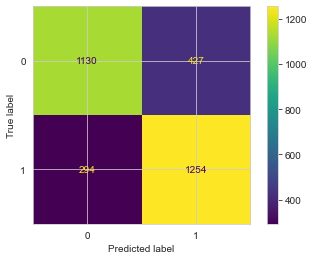

In [944]:
plot_confusion_matrix(gbc,x_test,y_test,values_format=".4g")

In [945]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1557
           1       0.75      0.81      0.78      1548

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



## 21.3 Choosing Best CV

In [946]:
for j in range(2,12):
    gbc_score=cross_val_score(gbc,x,y,cv=j)
    gbc_s=gbc_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbc_score*100)
    print("Accuracy Score:",gbc_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [76.07267105 76.28527252]
Accuracy Score: 76.17897178198685


At CV:- 3
Cross validation score is: [76.26086957 75.96404755 77.15279791]
Accuracy Score: 76.45923834255676


At CV:- 4
Cross validation score is: [76.45921917 76.72980286 74.83571705 77.50289911]
Accuracy Score: 76.38190954773869


At CV:- 5
Cross validation score is: [76.8115942  76.52173913 75.02415459 75.88206863 77.52537458]
Accuracy Score: 76.35298622639704


At CV:- 6
Cross validation score is: [76.92753623 75.76811594 77.73913043 74.60869565 75.87006961 77.95823666]
Accuracy Score: 76.47863075422845


At CV:- 7
Cross validation score is: [77.07910751 75.72684246 77.80784844 74.15426252 76.11637348 76.11637348
 77.74018945]
Accuracy Score: 76.39157104678463


At CV:- 8
Cross validation score is: [77.74343122 75.27047913 77.51159196 76.73879444 75.17401392 74.24593968
 77.7262181  77.88089714]
Accuracy Score: 76.53642069830295


At CV:- 9
Cross validation score is: [77.04347826 75.

**we can choose best CV 10.**

In [947]:
cross_val_score(gbc,x,y,cv=10)

array([0.77874396, 0.76328502, 0.75362319, 0.78357488, 0.76714976,
       0.74299517, 0.75362319, 0.76231884, 0.77562863, 0.77756286])

In [948]:
gbc_cv_score=cross_val_score(gbc,x,y,cv=10).mean()

In [949]:
gbc_cv_score

0.7658505499023538

In [950]:
gbc_acc_score

0.7677938808373591

# 22.Lets choose the best model with ROC AUC Curve

In [951]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [952]:
lr_pred=lr.predict(x_test)
knn_pred=knn.predict(x_test)
rfc_pred=rfc.predict(x_test)
dtc_pred=dtc.predict(x_test)
adc_pred=adc.predict(x_test)
gbc_pred=gbc.predict(x_test)

In [953]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_pred, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_pred, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rfc_pred, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, dtc_pred, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, adc_pred, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, gbc_pred, pos_label=1)

In [954]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [955]:
# auc scores
auc_score_lr = roc_auc_score(y_test, lr_pred)
auc_score_knn = roc_auc_score(y_test, knn_pred)
auc_score_rfc = roc_auc_score(y_test, rfc_pred)
auc_score_dtc = roc_auc_score(y_test, dtc_pred)
auc_score_adc = roc_auc_score(y_test, adc_pred)
auc_score_gbc = roc_auc_score(y_test, gbc_pred)
print(round(auc_score_lr,2)*100, round(auc_score_knn,2)*100,round(auc_score_rfc,2)*100,round(auc_score_dtc,2)*100,round(auc_score_adc,2)*100,round(auc_score_gbc,2)*100)

76.0 80.0 83.0 89.0 76.0 77.0


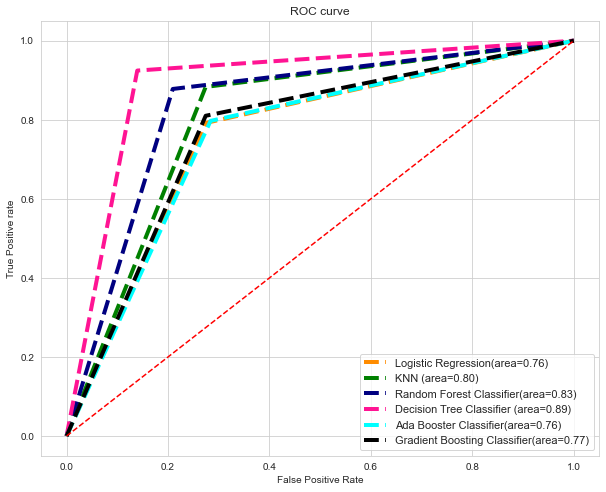

In [956]:
plt.figure(figsize=(10,8))
plt.plot(fpr1, tpr1, linestyle='--',color='darkorange',linewidth=4, label='Logistic Regression(area=%0.2f)'% auc_score_lr)
plt.plot(fpr2, tpr2, linestyle='--',color='green',linewidth=4, label='KNN (area=%0.2f)'% auc_score_knn)
plt.plot(fpr3,tpr3,linestyle='--',color='navy',linewidth=4, label='Random Forest Classifier(area=%0.2f)'% auc_score_rfc)
plt.plot(fpr4, tpr4, linestyle='--',color='deeppink',linewidth=4, label='Decision Tree Classifier (area=%0.2f)'% auc_score_dtc)
plt.plot(fpr5,tpr5,linestyle='--',color='aqua',linewidth=4, label='Ada Booster Classifier(area=%0.2f)'% auc_score_adc)
plt.plot(fpr6,tpr6,linestyle='--',color='black',linewidth=4, label='Gradient Boosting Classifier(area=%0.2f)'% auc_score_gbc)

plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(prop={'size':11},loc='lower right')
plt.savefig('ROC',dpi=300)
plt.show();

**As we can see from Roc Auc Curve that Random Forest Classifier amd Decistion Tree Classifier model is performing well in this dataset.**

# 23 Choosing best model by checking cross validation score

In [957]:
Logistic_Regression={"Accuracy Score":(lr_acc_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_acc_score-lr_cv_score}
Knn={"Accuracy Score":(knn_acc_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_acc_score-knn_cv_score}
Random_Forest_Classifier={"Accuracy Score":(rfc_acc_score,2),
                    "CV Score":(rfc_cv_score,2),
                    "Difference":rfc_acc_score-rfc_cv_score}
Decision_Tree_Classifier={"Accuracy Score":(dtc_acc_score,2),
                    "CV Score":(dtc_cv_score,2),
                    "Difference":dtc_acc_score-dtc_cv_score}
Ada_Booster_Classifier={"Accuracy Score":(adc_acc_score,2),
                    "CV Score":(adc_cv_score,2),
                    "Difference":adc_acc_score-adc_cv_score}
Gradient_Boosting_Classifier={"Accuracy Score":(gbc_acc_score,2),
                    "CV Score":(gbc_cv_score,2),
                    "Difference":gbc_acc_score-gbc_cv_score}



In [958]:
data=np.array([[lr_acc_score,lr_cv_score,lr_acc_score-lr_cv_score],[knn_acc_score,knn_cv_score,knn_acc_score-knn_cv_score],[rfc_acc_score,rfc_cv_score,rfc_acc_score-rfc_cv_score],[dtc_acc_score,dtc_cv_score,dtc_acc_score-dtc_cv_score],[adc_acc_score,adc_cv_score,adc_acc_score-adc_cv_score],[gbc_acc_score,gbc_cv_score,gbc_acc_score-gbc_cv_score]])

In [959]:
index_value=["LogisticRegression","KNeighborsClassifier","RandomForestClassifier","DecistionTreeClassifier","AdaBoosterClassifier","GradientBoostingClassifier"]

In [960]:
columns_value=["Accuracy Score","Cross Validation Score","Difference"]

In [961]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [962]:
model_selection

,Accuracy Score,Cross Validation Score,Difference
LogisticRegression,0.757810,0.758794,-0.000984
KNeighborsClassifier,0.754911,0.765366,-0.010455
RandomForestClassifier,0.834138,0.851182,-0.017043
DecistionTreeClassifier,0.811594,0.829824,-0.018230
AdaBoosterClassifier,0.756522,0.757055,-0.000533
GradientBoostingClassifier,0.767794,0.765851,0.001943


**As we can see AdaBoosterClassifier performing better in terms of difference between accuracy score vs Cross validation score.**

# 24. Hypertuning for our best model ( AdaBoosterClassfier)

In [963]:
from sklearn.model_selection import GridSearchCV

In [988]:
grid_param={
    "n_estimators":[10,20,30,40,50,],
    "learning_rate":np.arange(0.1,1,0.1),
    "algorithm":["SAMME","SAMME.R"]
}

In [989]:
grd=GridSearchCV(adc,param_grid=grid_param)

In [990]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(learning_rate=0.4, n_estimators=20),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [10, 20, 30, 40, 50]})

In [991]:
grd.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 20}

In [992]:
adc=grd.best_estimator_

In [993]:
adc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=20)

In [994]:
y_pred=adc.predict(x_test)

In [995]:
accuracy_score(y_test,y_pred)

0.7568438003220612

**As we can see after doing hyperparameter tuning our model accuracy has increased slightly from 75.65 to 75.68.**

# 25. Saving the Model

In [997]:
import pickle
filename="Customer_churn.pkl"
pickle.dump(adc,open(filename,"wb"))